In [2]:
import pandas as pd
ports = pd.read_csv('../ports.csv', sep='|')

In [3]:
display(ports.head())

,portId,name,portLocation,longitude,latitude,UN_LOCODE,countryName,ISO
0,61d36ed80a1807568ff9a064,Port of Algiers,Algiers,3.067222,36.773611,DZALG,Algeria,DZ
1,61d36ed80a1807568ff9a065,Port of Annaba,Annaba,7.772500,36.900556,DZAAE,Algeria,DZ
2,61d36edf0a1807568ff9a070,Port of Oran,Oran,-0.639722,35.712222,DZORN,Algeria,DZ
3,61d36ee00a1807568ff9a072,Port of Skikda,Skikda,6.905833,36.887500,DZSKI,Algeria,DZ
4,61d36ee10a1807568ff9a074,Port of Pago-Pago,Pago-Pago,-170.690556,-14.274167,ASPPG,American Samoa,AS


In [4]:
print(ports)

                        portId               name portLocation   longitude  \
0     61d36ed80a1807568ff9a064    Port of Algiers      Algiers    3.067222   
1     61d36ed80a1807568ff9a065     Port of Annaba       Annaba    7.772500   
2     61d36edf0a1807568ff9a070       Port of Oran         Oran   -0.639722   
3     61d36ee00a1807568ff9a072     Port of Skikda       Skikda    6.905833   
4     61d36ee10a1807568ff9a074  Port of Pago-Pago    Pago-Pago -170.690556   
...                        ...                ...          ...         ...   
1324  6367c622aa0cd188707a1eae              Hamad        Hamad   25.029460   
1325  6367cb14aa0cd188707a1eaf            Al Hidd      Al Hidd   50.667890   
1326  6367d9afaa0cd188707a1eb3             Aquaba       Aquaba   34.992790   
1327  663cb287244f580d97afce53   Port of Portbury     Portbury   -2.648735   
1328  663cb48be894e2f07d1c69b2       Bahrain Port      Bahrain   50.616667   

       latitude UN_LOCODE     countryName ISO  
0     36.773611

In [5]:
# Summary Statistics
print(ports.describe())

         longitude     latitude
count  1329.000000  1329.000000
mean     20.630528    35.146181
std      67.458101    25.098764
min    -173.300000   -53.794444
25%      -4.933000    25.920000
50%      13.933000    39.050000
75%      44.583000    53.882778
max     178.426111    71.643056


In [6]:
# Missing Values
print(ports.isnull().sum())

portId          0
name            0
portLocation    0
longitude       0
latitude        0
UN_LOCODE       0
countryName     0
ISO             0
dtype: int64


In [7]:
# Data Types
print(ports.dtypes)

portId           object
name             object
portLocation     object
longitude       float64
latitude        float64
UN_LOCODE        object
countryName      object
ISO              object
dtype: object


In [8]:
# Unique Values in Categorical Columns
print(ports['UN_LOCODE'].nunique())
print(ports['countryName'].nunique())

1329
140


# Counting vessels for specific country code
Approaches 1 - 3 all do the same

In [9]:
# Approach 1
# num_vessels_oslo = 0
# 
# for _, row in ports.iterrows():
#     if row['UN_LOCODE'] == 'NOOSL':
#         num_vessels_oslo +=1
# print(num_vessels_oslo)

# Approach 2
# print(ports[ports['UN_LOCODE'] == 'NOOSL'].shape[0])

# Approach 3
print(ports[ports['UN_LOCODE'] == 'NOOSL']['UN_LOCODE'].count())

1


In [10]:
print(ports['portLocation'])

0         Algiers
1          Annaba
2            Oran
3          Skikda
4       Pago-Pago
          ...    
1324        Hamad
1325      Al Hidd
1326       Aquaba
1327     Portbury
1328      Bahrain
Name: portLocation, Length: 1329, dtype: object


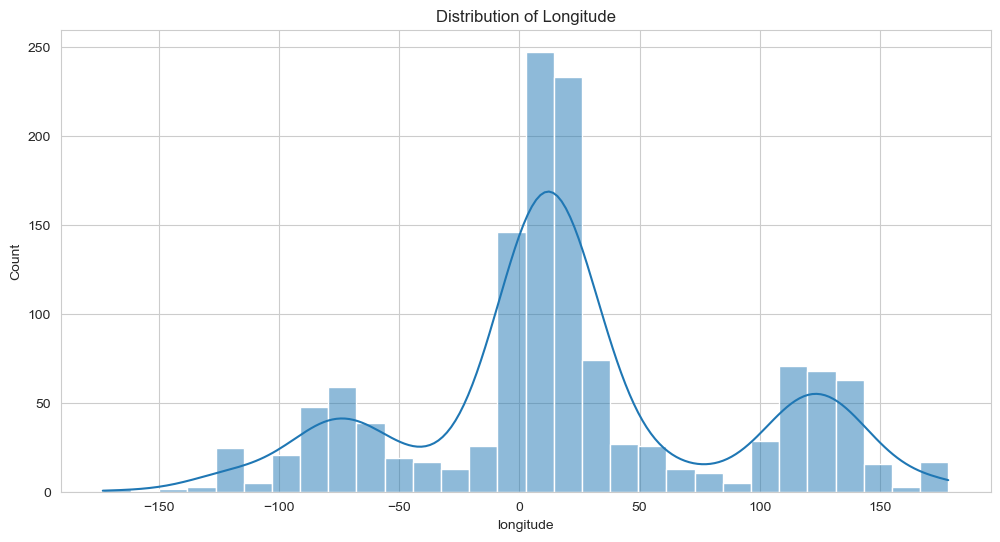

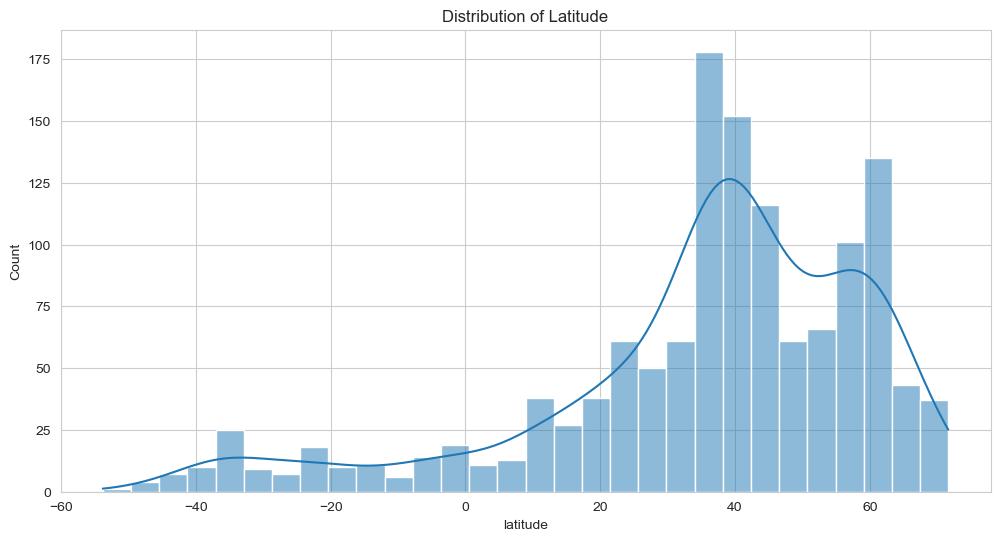

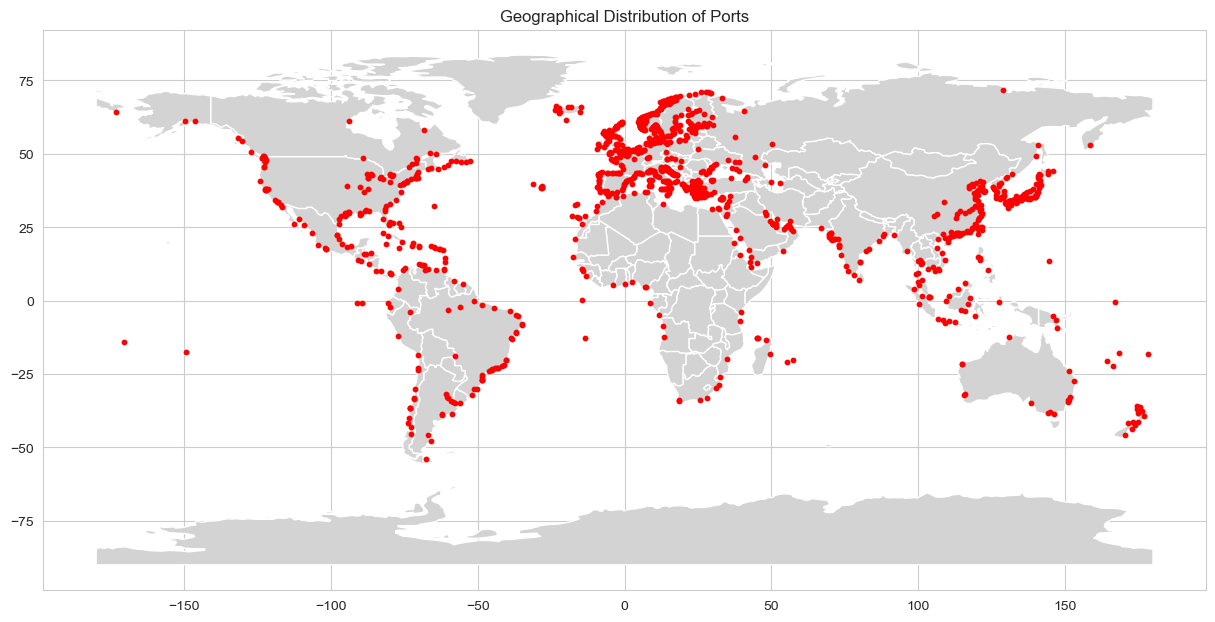

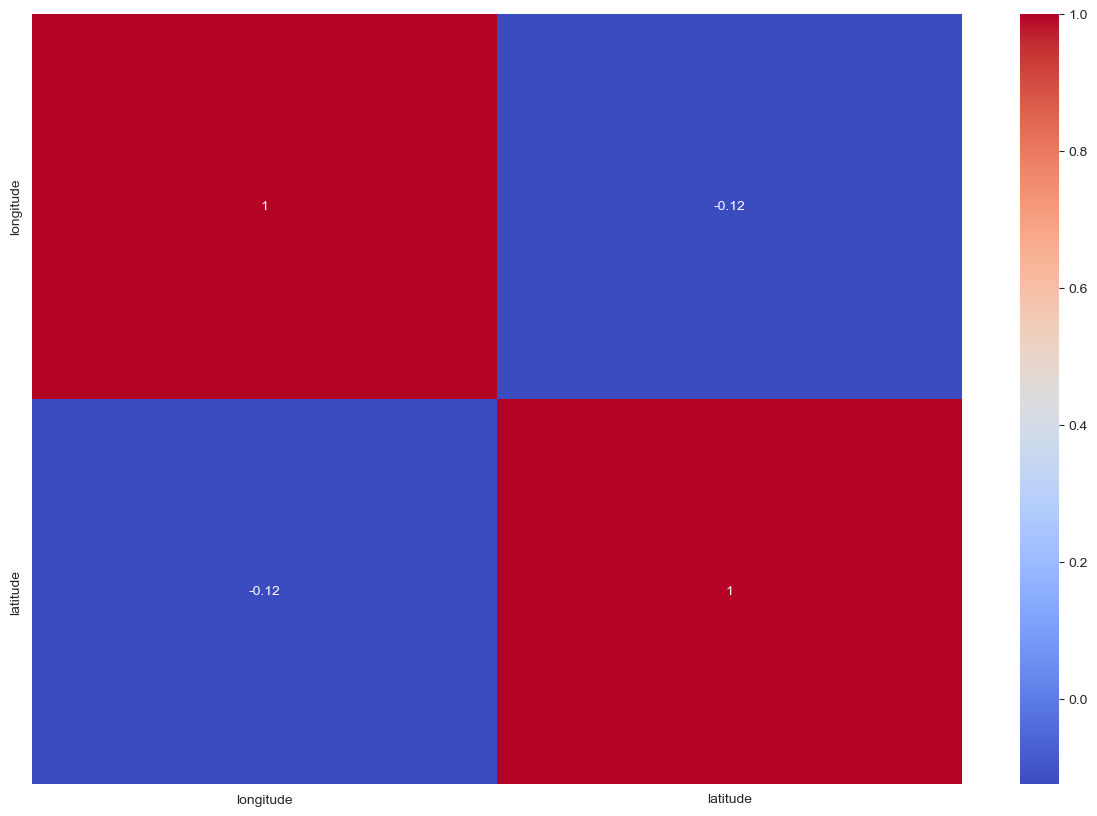

In [11]:
# Distribution Analysis
import matplotlib.pyplot as plt
import seaborn as sns

# Distribution of Longitude and Latitude
plt.figure(figsize=(12, 6))
sns.histplot(ports['longitude'], kde=True, bins=30)
plt.title('Distribution of Longitude')
plt.show()

plt.figure(figsize=(12, 6))
sns.histplot(ports['latitude'], kde=True, bins=30)
plt.title('Distribution of Latitude')
plt.show()

# Geographical Analysis
import geopandas as gpd
from shapely.geometry import Point

# Create a GeoDataFrame
geometry = [Point(xy) for xy in zip(ports['longitude'], ports['latitude'])]
geo_df = gpd.GeoDataFrame(ports, geometry=geometry)

# Plot the ports on a world map
world = gpd.read_file('../natural_earth_maps/ne_110m_admin_0_countries.shp')
fig, ax = plt.subplots(figsize=(15, 10))
world.plot(ax=ax, color='lightgrey')
geo_df.plot(ax=ax, markersize=10, color='red', marker='o', label='Ports')
plt.title('Geographical Distribution of Ports')
plt.show()

ports_corr_matrix = ports.drop(columns=['portId', 'name', 'portLocation', 'UN_LOCODE', 'countryName', 'ISO'])

# Correlation Analysis
corr_matrix = ports_corr_matrix.corr()
plt.figure(figsize=(15, 10))
sns.heatmap(corr_matrix, annot=True, cmap='coolwarm')
plt.show()
